<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="skyblue">University of Tehran</i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    </div>
</div>

## Table of Contents

- [Libraries](#Libraries)

- [Exploring the Dataset and Preprocessing](#Exploring-the-Dataset-and-Preprocessing)

- [Building Model](#Building-Model)

- [Training Model](#Training-Model)

- [Evaluate Model](#Evaluate-Model)

## Mutual Information Analysis of Deep Neural Network Training on MNIST

### Libraries:

In [ ]:
!pip install git+https://github.com/gregversteeg/NPEET.git

  Cloning https://github.com/gregversteeg/NPEET.git to /tmp/pip-req-build-zs69zo82
  Running command git clone --filter=blob:none --quiet https://github.com/gregversteeg/NPEET.git /tmp/pip-req-build-zs69zo82
  Resolved https://github.com/gregversteeg/NPEET.git to commit 8b0d9485423f74e5eb199324cf362765596538d3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for NPEET: filename=NPEET-1.0.1-py3-none-any.whl size=7348 sha256=eeef2b71df37484d82638fa6d8cd888441428ab1e4d70fbf7624732f2e2c4132
  Stored in directory: /tmp/pip-ephem-wheel-cache-pwmd2udh/wheels/67/14/69/40f6509002be31143a881d12b03bb7e869b95622fea90bdc1f
Successfully built NPEET


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from npeet.entropy_estimators import mi

### Exploring the Dataset and Preprocessing:

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

train_data_amount = y_train.shape[0]
test_data_amount = y_test.shape[0]
total_data_amount = train_data_amount + test_data_amount

train_percentage = (train_data_amount / total_data_amount) * 100
test_percentage = (test_data_amount / total_data_amount) * 100

print(f"Training data: {train_percentage:.2f}%")
print(f"Testing data: {test_percentage:.2f}%")

Training data: 85.71%
Testing data: 14.29%


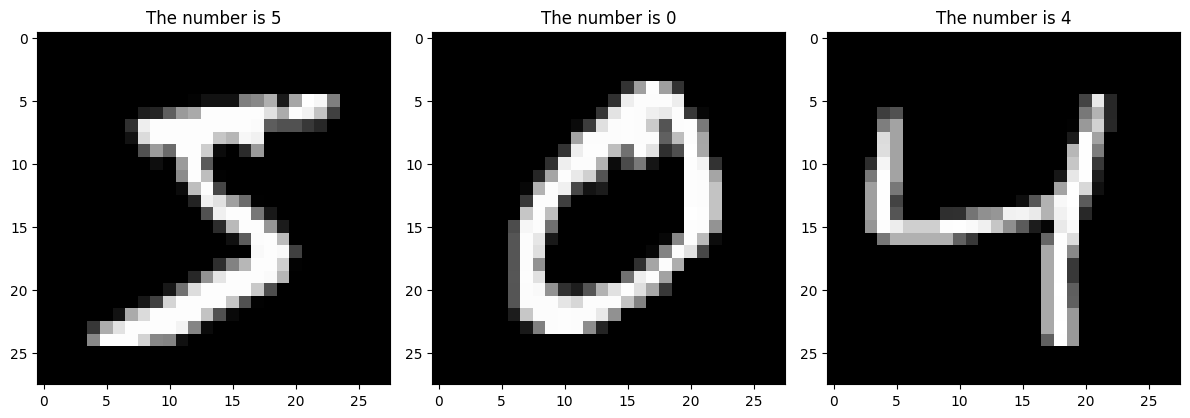

In [ ]:
number_of_images = 3

plt.figure(figsize=(4 * number_of_images, 4))

for image_idx in range(number_of_images):
    plt.subplot(1, number_of_images, image_idx + 1)
    plt.imshow(x_train[image_idx], cmap='gray')
    plt.title(f"The number is {y_train[image_idx]}")

plt.tight_layout()
plt.show()

### Building Model:

In [ ]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128, activation='relu', name="dense_1")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(128, activation='relu', name="dense_2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(128, activation='relu', name="dense_3")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(128, activation='relu', name="dense_4")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name="output")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,354 (599.04 KB)

 Trainable params: 152,330 (595.04 KB)

 Non-trainable params: 1,024 (4.00 KB)

### Training Model:

In [ ]:
def estimate_mi_t_y(act, labels):
    mi_neurons = mutual_info_classif(act, labels, discrete_features=False)
    return np.mean(mi_neurons)

def estimate_mi_x_t(X, T):
    return mi(X, T)

layer_names = ["dense_1", "dense_2", "dense_3", "dense_4", "output"]
layer_outputs = [model.get_layer(name).output for name in layer_names]
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

epochs = 40
batch_size = 256
mi_x_t_history = {name: [] for name in layer_names}
mi_t_y_history = {name: [] for name in layer_names}

print("\nEpoch |  Loss  | Accuracy | Avg I(X;T) | Avg I(T;Y)")
print("-" * 52)

for epoch in range(epochs):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=3)

    train_loss = history.history['loss'][0]
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    sample_x = x_train[:1000]  # Shape: (1000, 28, 28)
    sample_y = y_train[:1000]  # Shape: (1000,)
    sample_x_flat = sample_x.reshape(len(sample_x), -1)  # Shape: (1000, 784)

    activations = activation_model.predict(sample_x, batch_size=256, verbose=0)

    for layer_name, act in zip(layer_names, activations):
        mi_x_t = estimate_mi_x_t(sample_x_flat, act)
        mi_t_y = estimate_mi_t_y(act, sample_y)
        mi_x_t_history[layer_name].append(mi_x_t)
        mi_t_y_history[layer_name].append(mi_t_y)

    print(f"{epoch+1:4d}  | {test_loss:.4f} | {test_acc:.5f}  | {np.mean(list(mi_x_t_history.values())[-1]):.7f}  | {np.mean(list(mi_t_y_history.values())[-1]):.7f}")


Epoch |  Loss  | Accuracy | Avg I(X;T) | Avg I(T;Y)
----------------------------------------------------
   1  | 0.1233 | 0.96110  | 1.7951164  | 0.5296895
   2  | 0.1068 | 0.96760  | 1.8916324  | 0.5380009
   3  | 0.0917 | 0.97130  | 1.9378916  | 0.5440563
   4  | 0.0952 | 0.97140  | 1.9534716  | 0.5457903
   5  | 0.0891 | 0.97330  | 1.9772369  | 0.5521638
   6  | 0.0863 | 0.97390  | 2.0059120  | 0.5588486
   7  | 0.0807 | 0.97640  | 2.0261777  | 0.5660209
   8  | 0.0784 | 0.97680  | 2.0437850  | 0.5662505
   9  | 0.0751 | 0.97880  | 2.0610102  | 0.5660537
  10  | 0.0788 | 0.97690  | 2.0771072  | 0.5671379
  11  | 0.0787 | 0.97790  | 2.0884071  | 0.5708219
  12  | 0.0738 | 0.98010  | 2.0983762  | 0.5729242
  13  | 0.0744 | 0.97980  | 2.1073211  | 0.5743059
  14  | 0.0740 | 0.97920  | 2.1167434  | 0.5760594
  15  | 0.0777 | 0.97910  | 2.1220224  | 0.5764080
  16  | 0.0769 | 0.97890  | 2.1302961  | 0.5785819
  17  | 0.0687 | 0.98220  | 2.1344164  | 0.5805346
  18  | 0.0782 | 0.97760  |

### Evaluate Model:

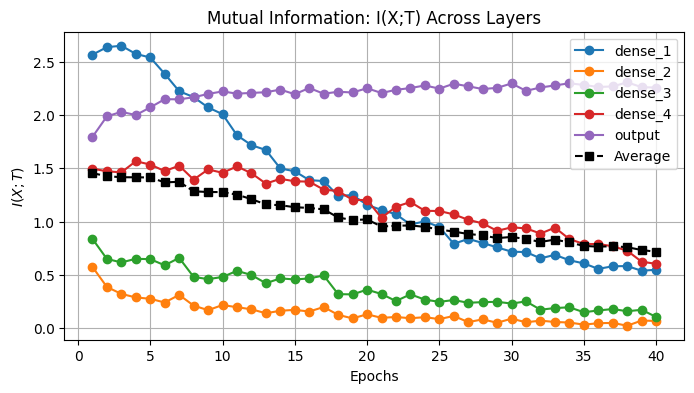

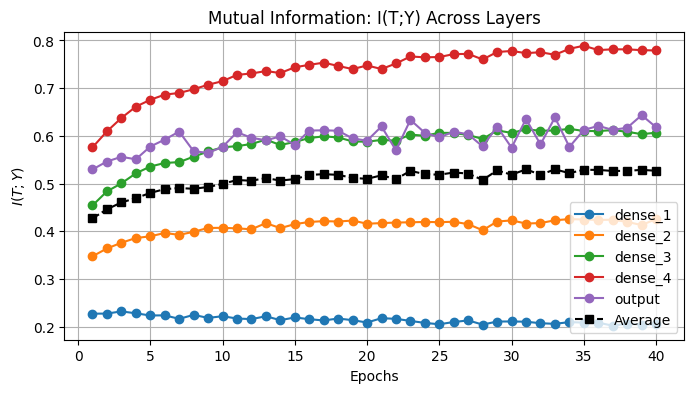

In [ ]:
plt.figure(figsize=(8, 4))
for layer_name in layer_names:
    plt.plot(range(1, epochs+1), mi_x_t_history[layer_name], marker='o', label=f"{layer_name}")

avg_mi_x_t = np.mean([mi_x_t_history[layer] for layer in layer_names], axis=0)
plt.plot(range(1, epochs+1), avg_mi_x_t, marker='s', linestyle='--', color='black', label="Average")

plt.xlabel("Epochs")
plt.ylabel(r"$I(X;T)$")
plt.title("Mutual Information: I(X;T) Across Layers")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
for layer_name in layer_names:
    plt.plot(range(1, epochs+1), mi_t_y_history[layer_name], marker='o', label=f"{layer_name}")

avg_mi_t_y = np.mean([mi_t_y_history[layer] for layer in layer_names], axis=0)
plt.plot(range(1, epochs+1), avg_mi_t_y, marker='s', linestyle='--', color='black', label="Average")

plt.xlabel("Epochs")
plt.ylabel(r"$I(T;Y)$")
plt.title("Mutual Information: I(T;Y) Across Layers")
plt.legend()
plt.grid(True)
plt.show()


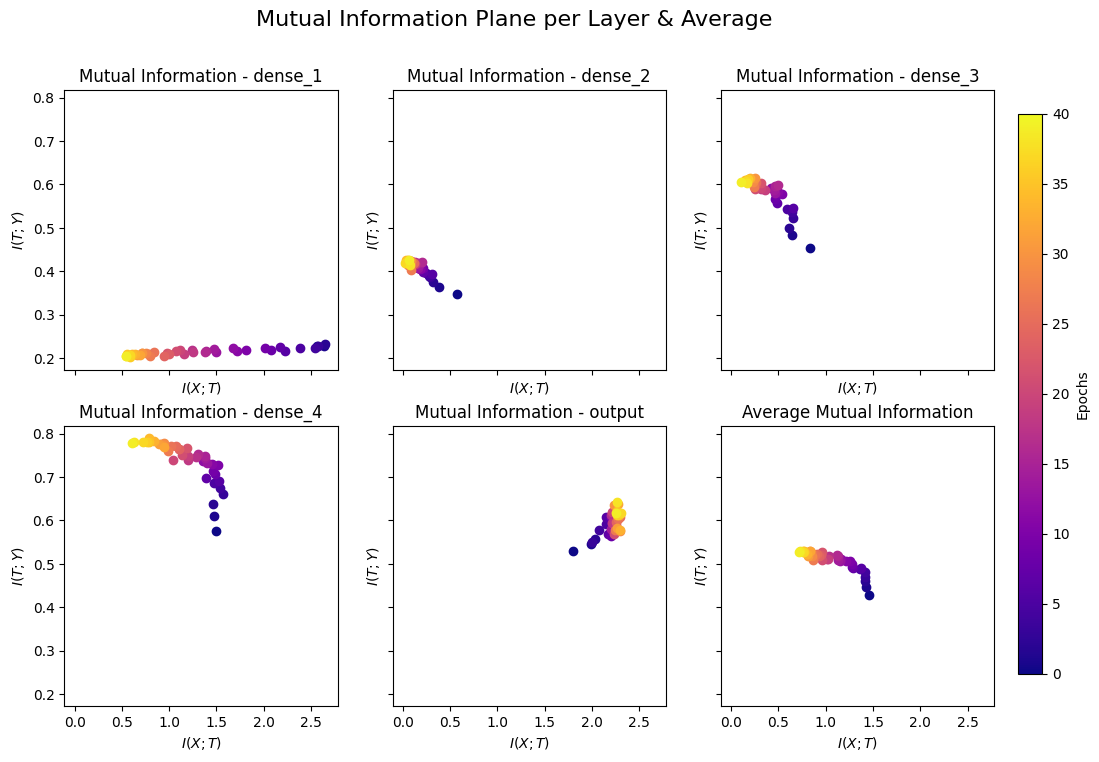

In [ ]:
num_layers = len(layer_names)
rows, cols = 2, 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8), sharex=True, sharey=True)

axes = axes.flatten()

for idx, layer in enumerate(layer_names):
    ax = axes[idx]

    mi_x_t_vals = mi_x_t_history[layer]
    mi_t_y_vals = mi_t_y_history[layer]

    for epoch in range(epochs):
        scatter = ax.scatter(mi_x_t_vals[epoch], mi_t_y_vals[epoch], c=[epoch], cmap='plasma', vmin=0, vmax=epochs)

    ax.set_xlabel(r"$I(X;T)$")
    ax.set_ylabel(r"$I(T;Y)$")
    ax.set_title(f"Mutual Information - {layer}")

avg_mi_x_t_vals = np.mean([mi_x_t_history[layer] for layer in layer_names], axis=0)
avg_mi_t_y_vals = np.mean([mi_t_y_history[layer] for layer in layer_names], axis=0)

avg_ax = axes[num_layers]
for epoch in range(epochs):
    avg_ax.scatter(avg_mi_x_t_vals[epoch], avg_mi_t_y_vals[epoch], c=[epoch], cmap='plasma', vmin=0, vmax=epochs)

avg_ax.set_xlabel(r"$I(X;T)$")
avg_ax.set_ylabel(r"$I(T;Y)$")
avg_ax.set_title("Average Mutual Information")

for idx in range(num_layers + 1, len(axes)):
    fig.delaxes(axes[idx])

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(scatter, cax=cbar_ax, label="Epochs")

plt.suptitle("Mutual Information Plane per Layer & Average", fontsize=16)
# plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
